In [1]:
# import sys
# sys.path.append('/Users/pasquini/Bioinformatics/usr/lib/python3.7/site-packages')
# sys.path.append('/Users/pasquini/Library/Python/3.7/lib/python/site-packages/')
# sys.path.append('/Users/pasquini/Bioinformatics/software/leidenalg/build/lib.macosx-10.14-x86_64-3.7')
# import sys
# sys.path.append('/group/crtd_bergmann/Giovanni/software/scarches_biocluster/')

In [2]:
from collections import defaultdict
import scanpy as sc
import scanpy.external as sce
import scipy.io
# import scrublet as scr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import scvelo as scv
#import velocyto as vcy
from os import listdir
from os.path import isfile, join
import glob
from collections import Counter
import loompy as lp
import numba
import llvmlite

# import mnnpy
from matplotlib import colors

In [3]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.6 pynndescent==0.5.7


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [6]:
sc.set_figure_params(dpi=500,dpi_save=1000)

In [7]:
adata = sc.read('./write/HiQ_final_adata.h5ad')

**Subset**

In [8]:
adata = adata[adata.obs['pred_cell_type'] != 'IPC']
pseudo_adata = adata[adata.obs['leiden'].isin(('0','1','2', '3', '4','5','7','8','12'))]

In [9]:
pseudo_adata.write('./write/pseudo_adata.h5ad')
pseudo_adata = sc.read('./write/pseudo_adata.h5ad')

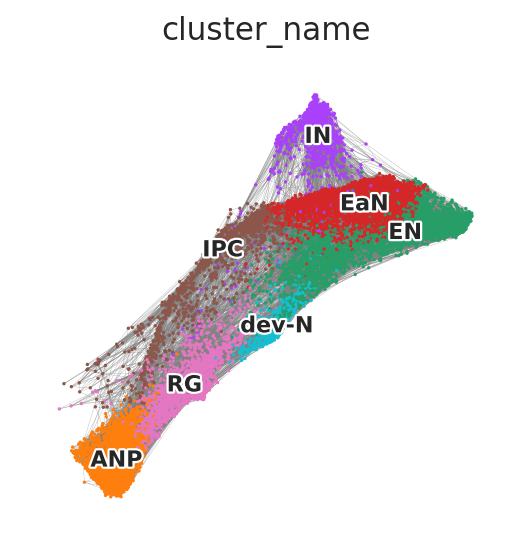

In [20]:
sc.pl.draw_graph(pseudo_adata,
                 color=['cluster_name'],
                 legend_loc = "on data",
                 frameon =False,
                 edges=True,
                 legend_fontsize=10,
                 legend_fontoutline=2)

In [11]:
sc.set_figure_params(dpi_save=1000)

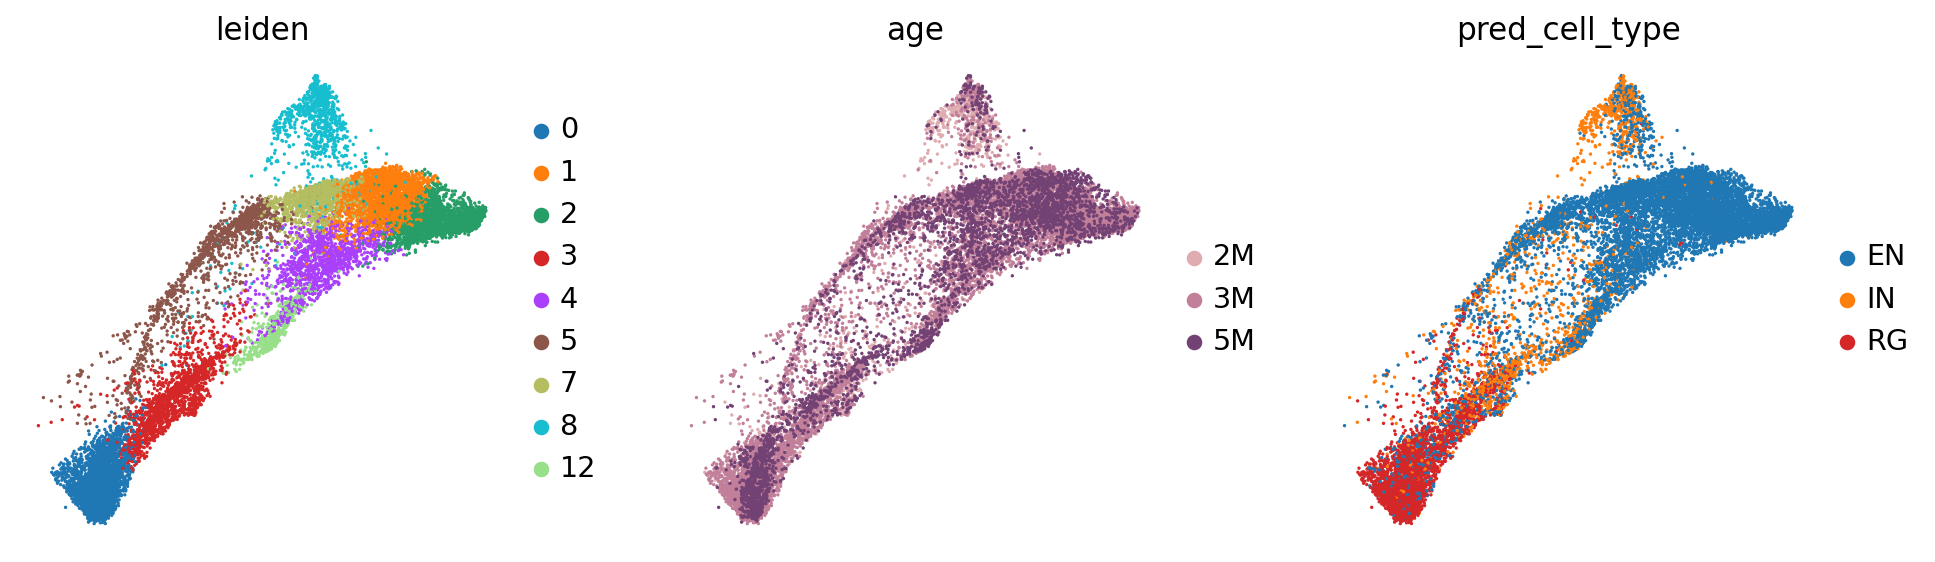

In [12]:
sc.pl.draw_graph(
                 pseudo_adata,
                 color=['leiden','age','pred_cell_type'],
                 cmap='viridis',
                 frameon =False,
                 edges=False,
                 save='_NoIPC_pseudotime.svg',
)



In [13]:
pseudo_adata.uns['iroot'] = np.flatnonzero(pseudo_adata.obs['pred_cell_type'].str.startswith(('RG')))[0]

In [14]:
sc.tl.dpt(pseudo_adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


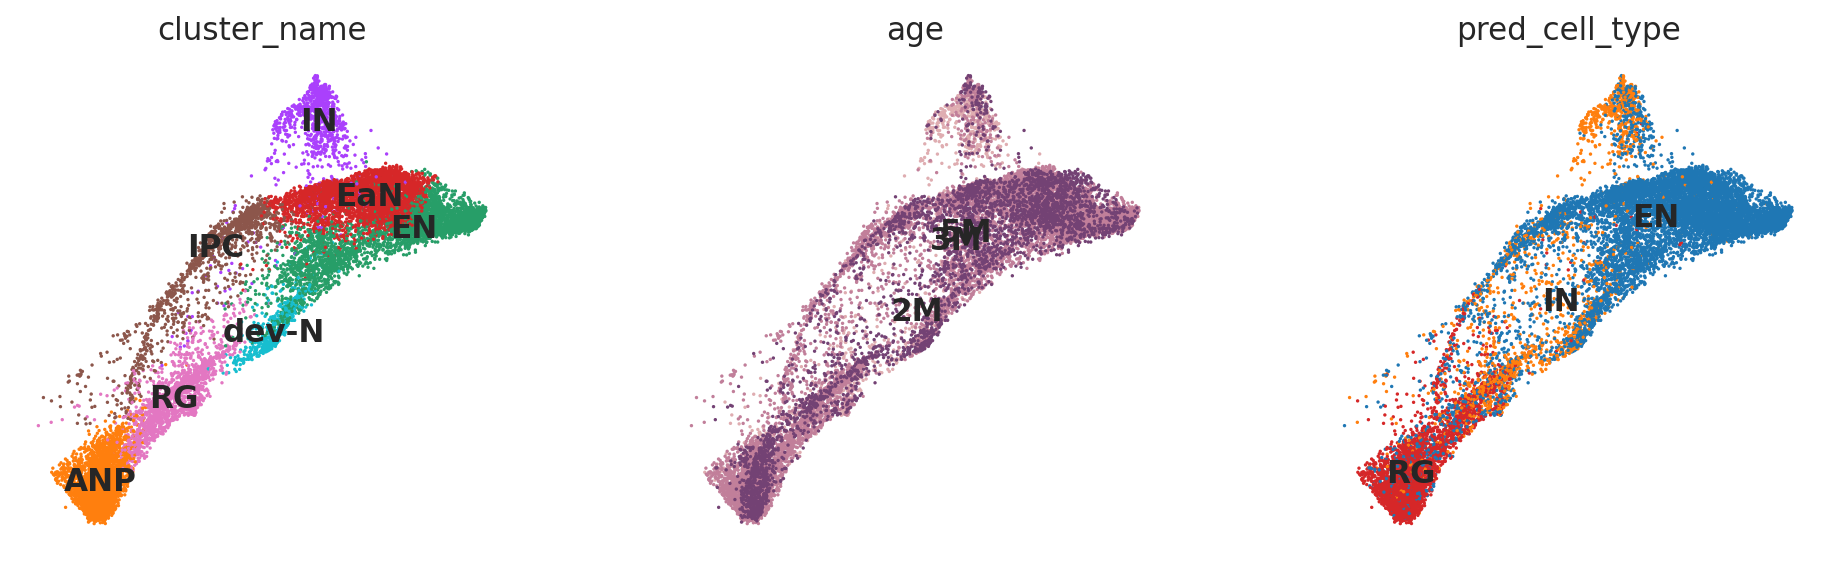

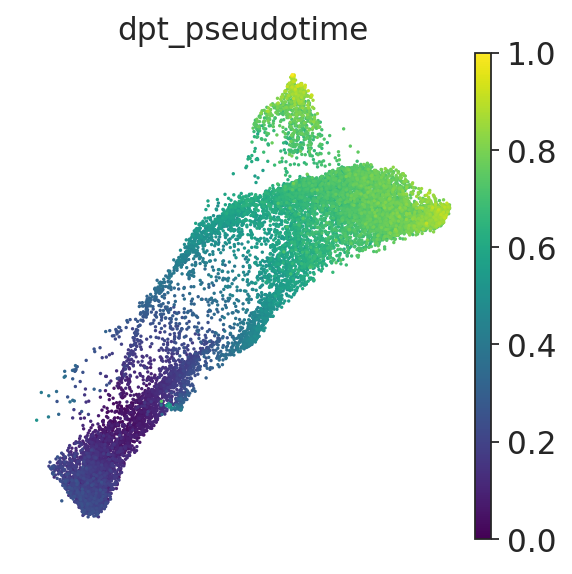

In [19]:
sc.pl.draw_graph(
                 pseudo_adata,
                 color=['cluster_name','age','pred_cell_type'],
                 cmap='viridis',
                 frameon =False,
                legend_loc="on data"
)
sc.pl.draw_graph(
                 pseudo_adata,
                 color=['dpt_pseudotime'], cmap='viridis', frameon =False,
                  save='_subdata_pseudotime.svg',
)


<Figure size 800x240 with 0 Axes>

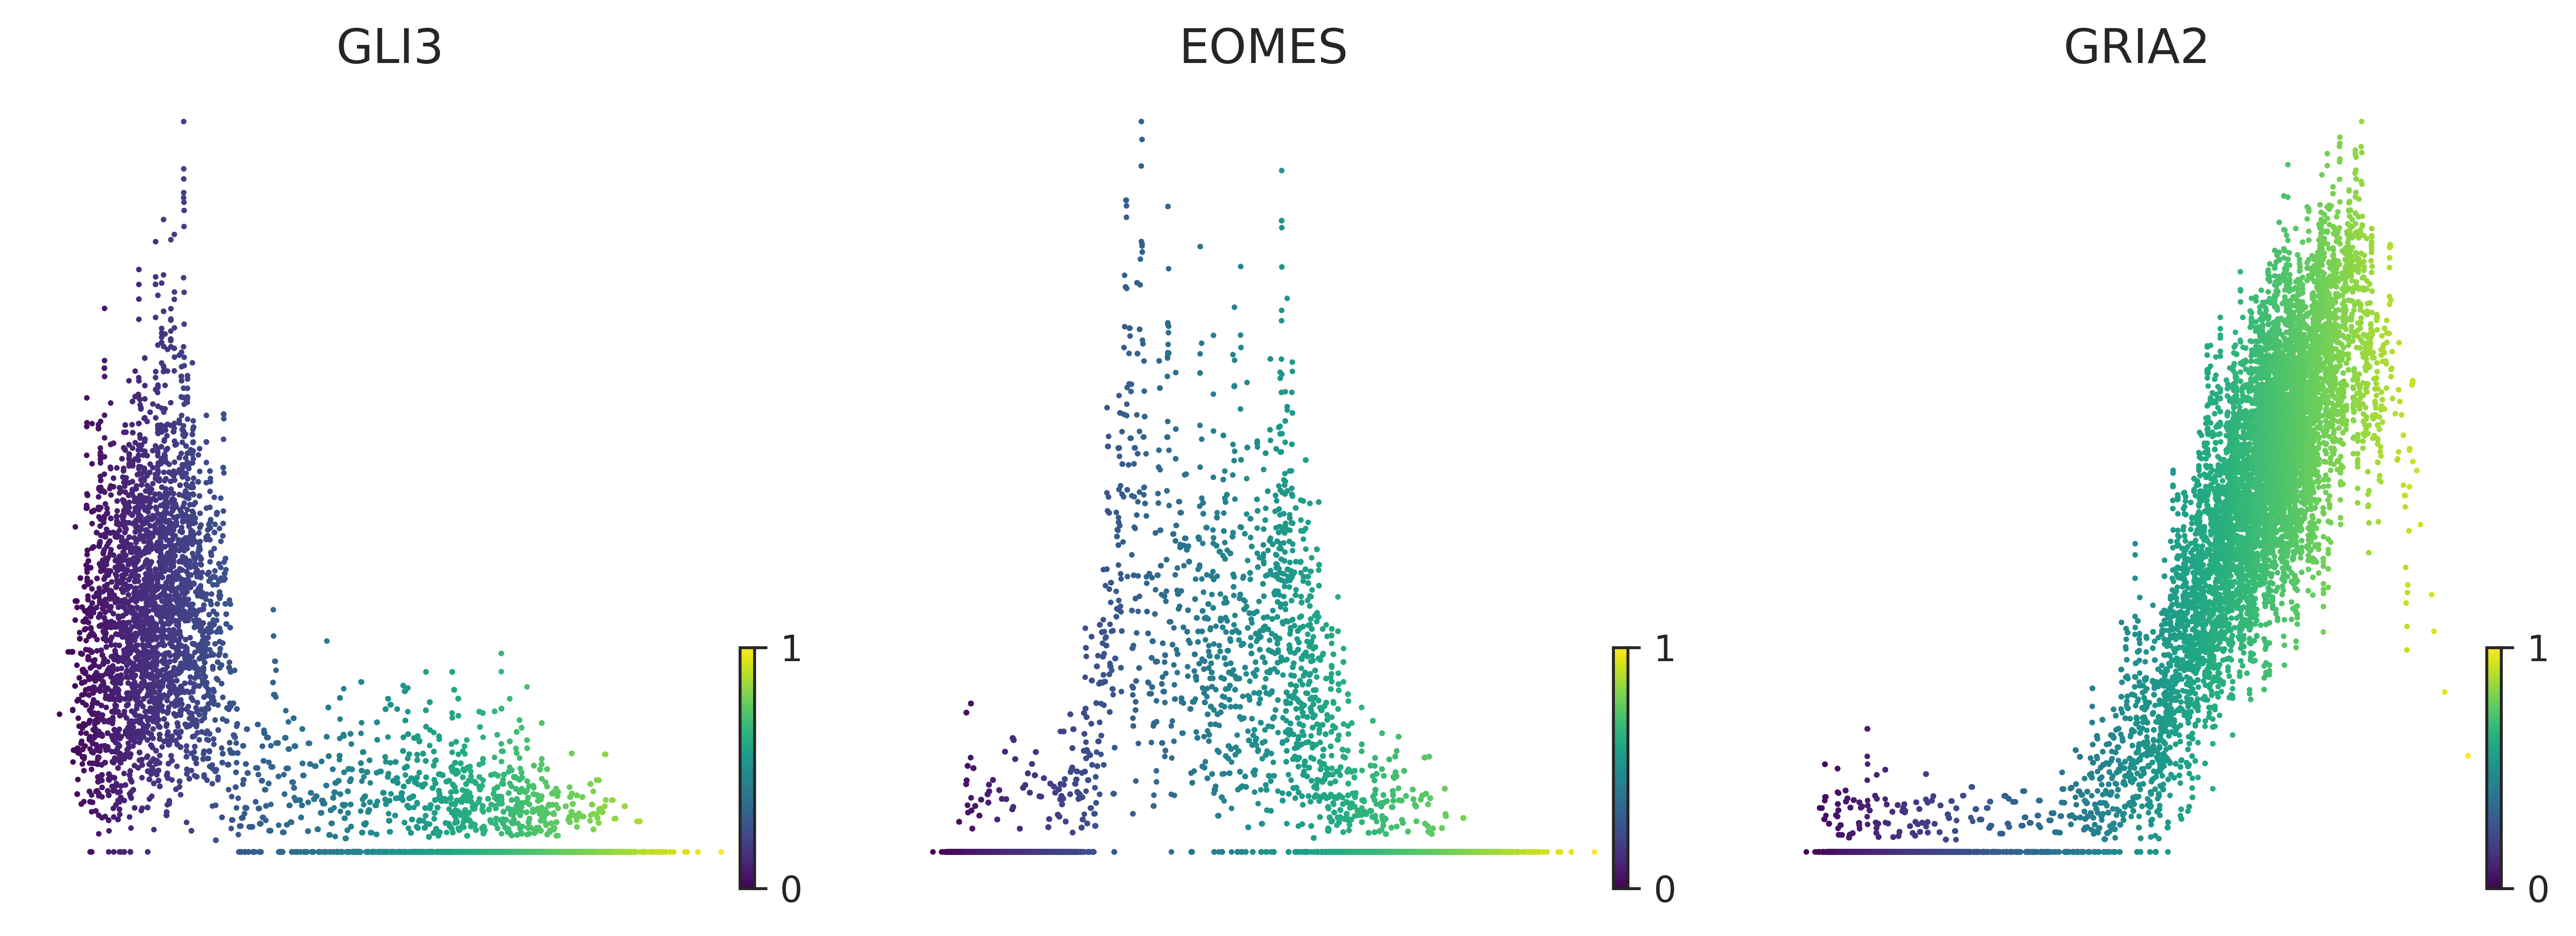

<Figure size 800x240 with 0 Axes>

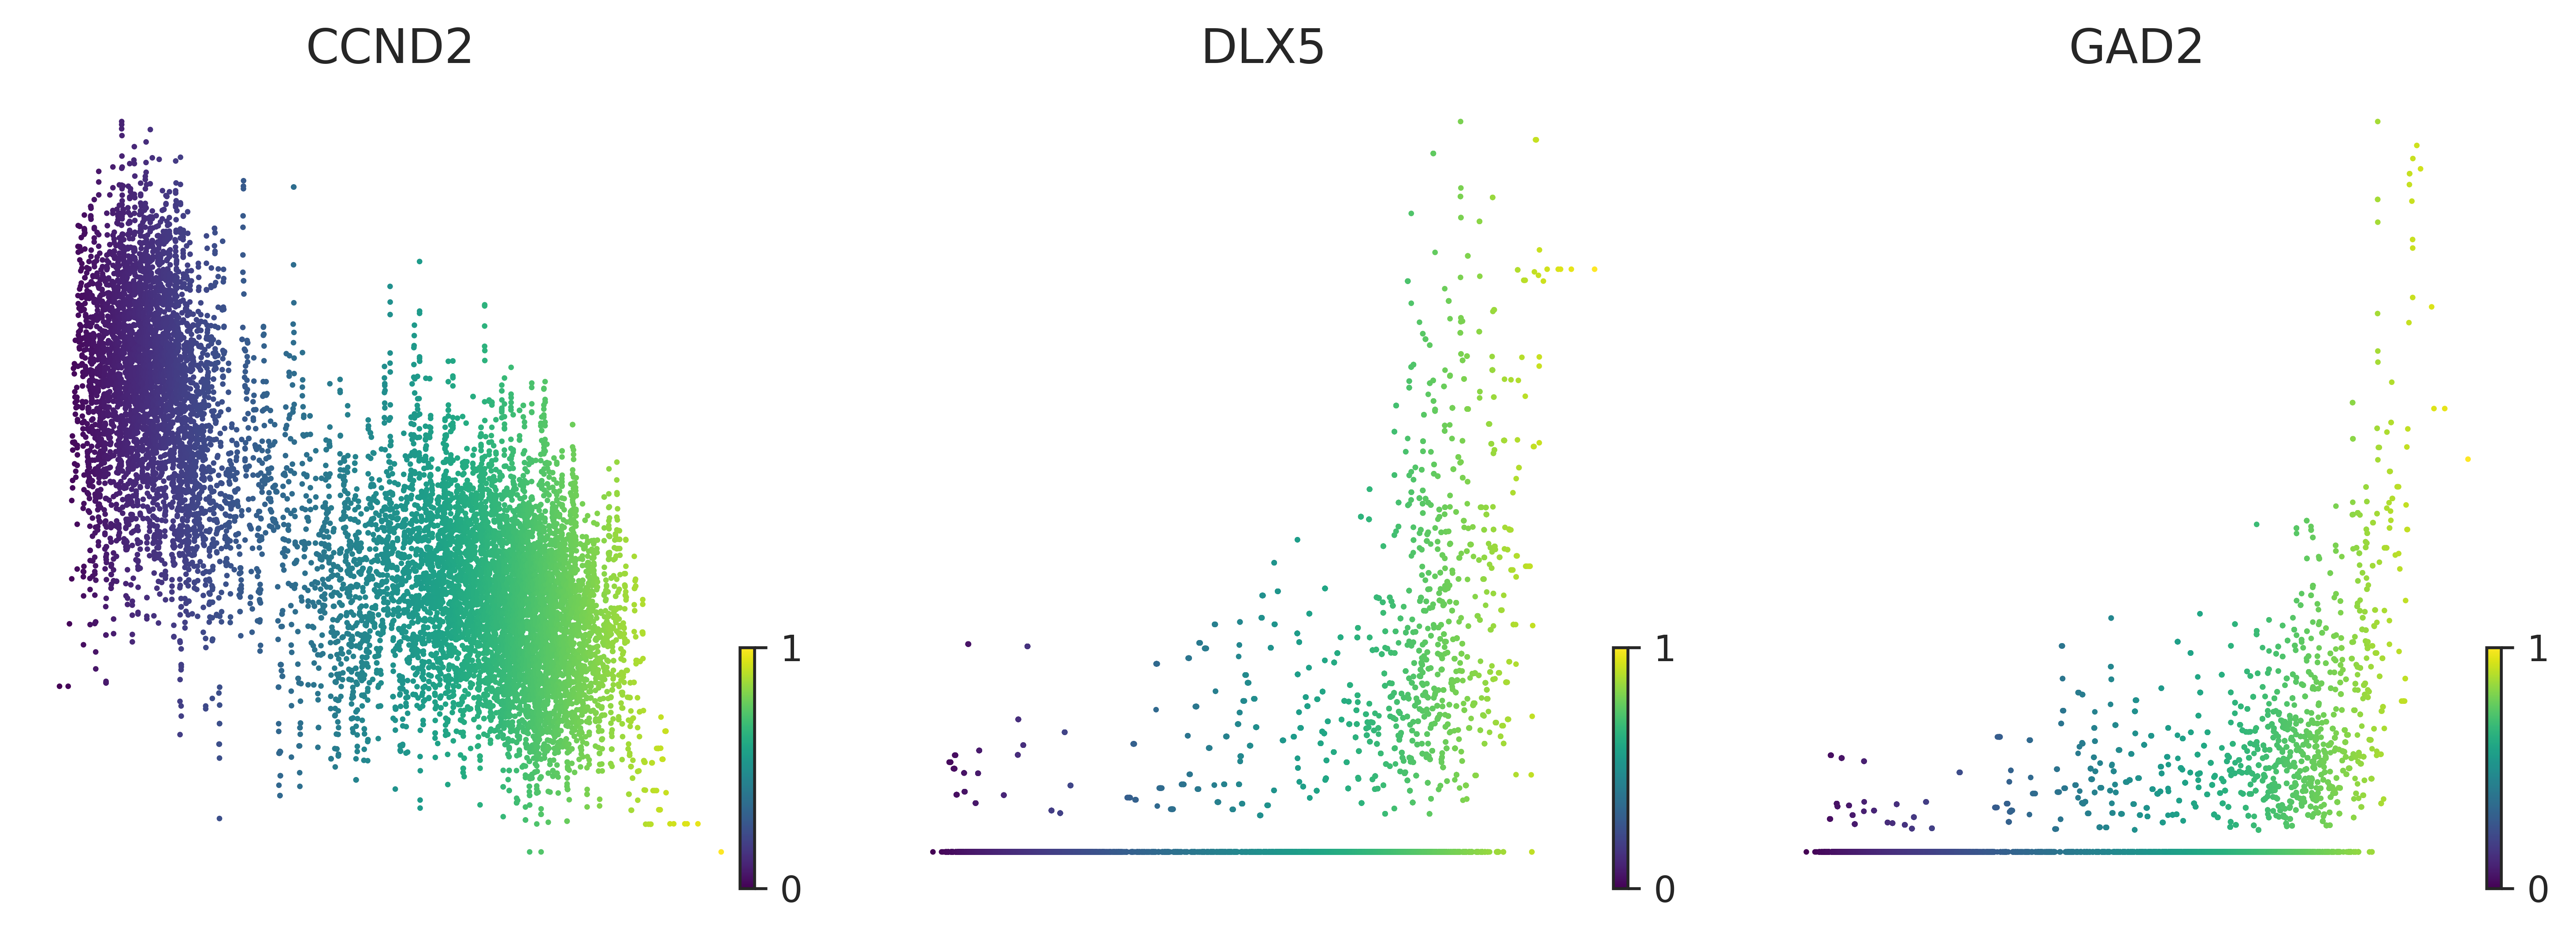

In [16]:
sns.set_style("white")
plt.figure(figsize=(10, 3))
scv.pl.scatter(
               pseudo_adata,
               x='dpt_pseudotime', 
               y=['GLI3','EOMES','GRIA2'],
#                use_raw=True,
               #fontsize=16,
               color='dpt_pseudotime',
#                size=30,
               n_convolve=10,
#                smooth = 100,
               #basis='dpt_pseudotime',
               frameon=False,
               add_assignments=True,
               #show_linear_fit=True,
               #show_density=True,
               fontsize=13,
#                groups='d60',
               rug=False,
               show_polyfit=False,
               #perc=[10,90],
               show_assignments=True,
               dpi=300,
               cmap='viridis',
               legend_loc='none')

sns.set_style("white")
plt.figure(figsize=(10, 3))
scv.pl.scatter(
               pseudo_adata,
               x='dpt_pseudotime', 
               y=['CCND2','DLX5','GAD2'],
#                use_raw=True,
               #fontsize=16,
               color='dpt_pseudotime',
#                size=30,
               n_convolve=10,
#                smooth = 100,
               #basis='dpt_pseudotime',
               frameon=False,
               add_assignments=True,
               #show_linear_fit=True,
               #show_density=True,
               fontsize=13,
#                groups='d60',
               rug=False,
               show_polyfit=False,
               #perc=[10,90],
               show_assignments=True,
               dpi=300,
               cmap='viridis',
               legend_loc='none')


saving figure to file ./figures/scvelo__NoIPC_dorsal_markers.svg


<Figure size 800x240 with 0 Axes>

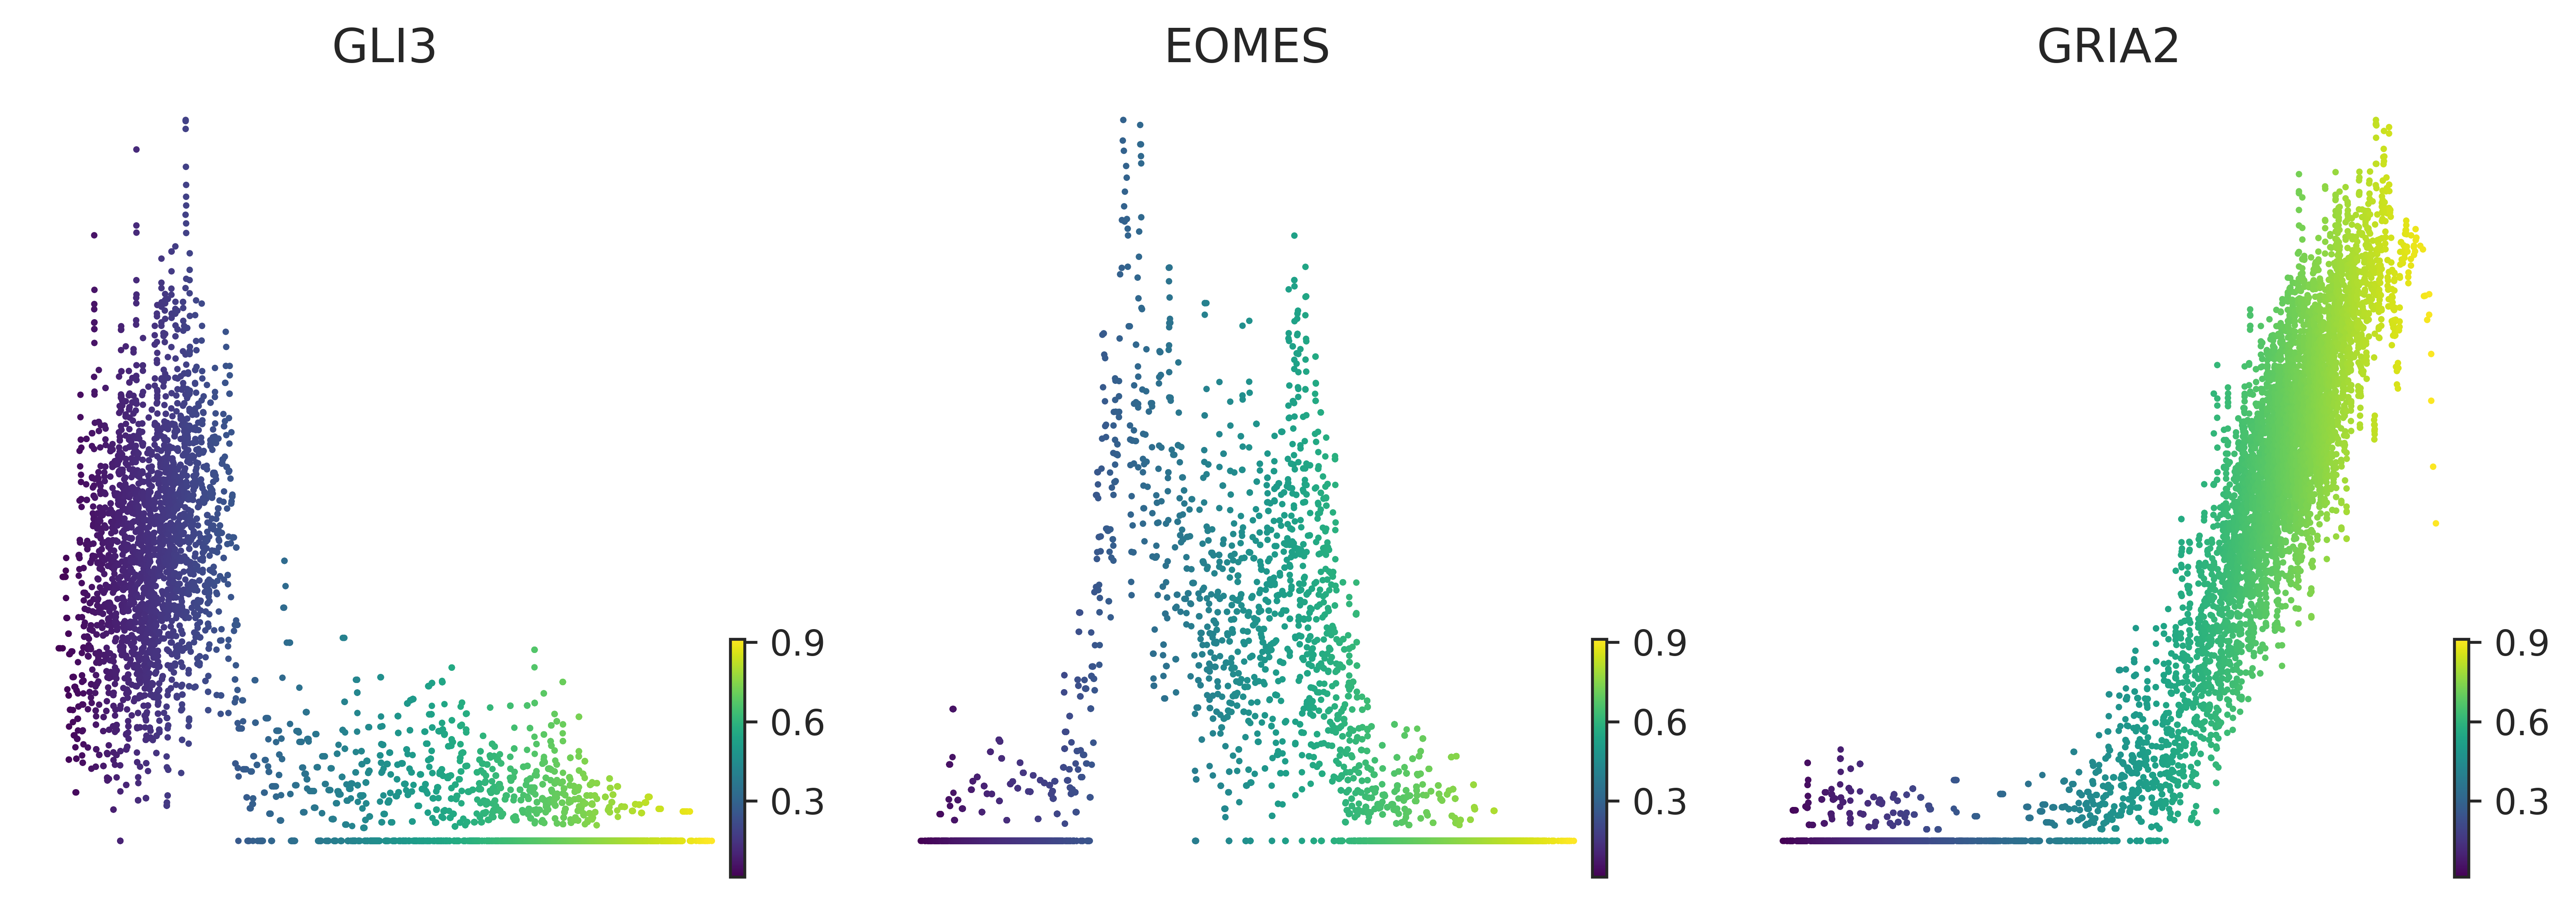

saving figure to file ./figures/scvelo__NoIPC_ventral_markers.svg


<Figure size 800x240 with 0 Axes>

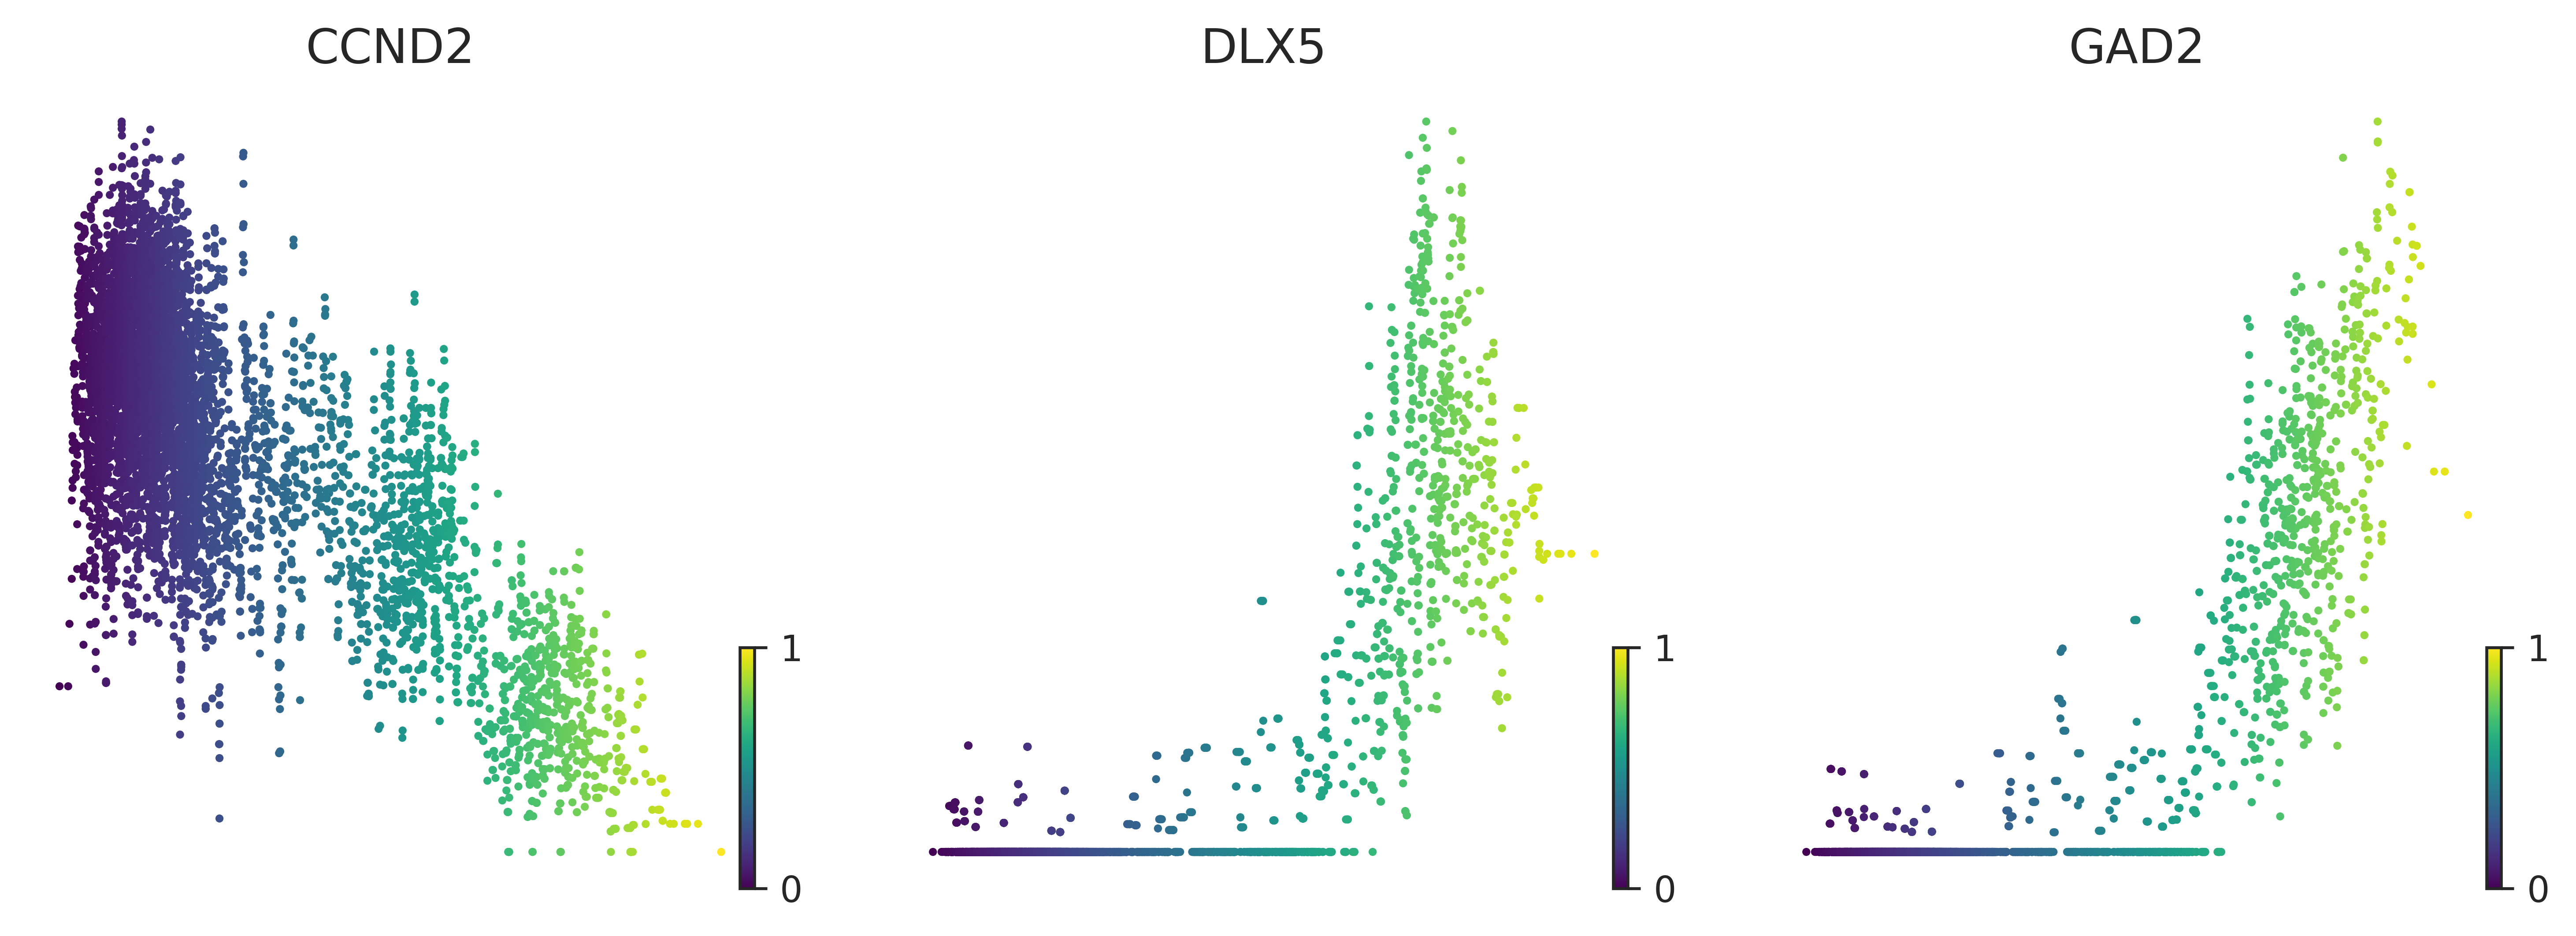

In [17]:

sns.set_style("white")
plt.figure(figsize=(10, 3))
scv.pl.scatter(
               pseudo_adata[pseudo_adata.obs['leiden'].str.startswith(('0','5','7','1','2'))],
               x='dpt_pseudotime', 
               y=['GLI3','EOMES','GRIA2'],
#                use_raw=True,
               #fontsize=16,
               color='dpt_pseudotime',
#                size=30,
               n_convolve=10,
#                smooth = 100,
               #basis='dpt_pseudotime',
               frameon=False,
               add_assignments=True,
               #show_linear_fit=True,
               #show_density=True,
               fontsize=13,
#                groups='d60',
               rug=False,
               show_polyfit=False,
               #perc=[10,90],
               show_assignments=True,
               dpi=300,
               cmap='viridis',
               legend_loc='none',
               save='_NoIPC_dorsal_markers.svg',
)

sns.set_style("white")
plt.figure(figsize=(10, 3))
scv.pl.scatter(
               pseudo_adata[pseudo_adata.obs['leiden'].str.startswith(('0','3','5','8'))],
               x='dpt_pseudotime', 
               y=['CCND2','DLX5','GAD2'],
#                use_raw=True,
               #fontsize=16,
               color='dpt_pseudotime',
#                size=30,
               n_convolve=10,
#                smooth = 100,
               #basis='dpt_pseudotime',
               frameon=False,
               add_assignments=True,
               #show_linear_fit=True,
               #show_density=True,
               fontsize=13,
#                groups='d60',
               rug=False,
               show_polyfit=False,
               #perc=[10,90],
               show_assignments=True,
               dpi=300,
               cmap='viridis',
               legend_loc='none',
               save='_NoIPC_ventral_markers.svg',
)

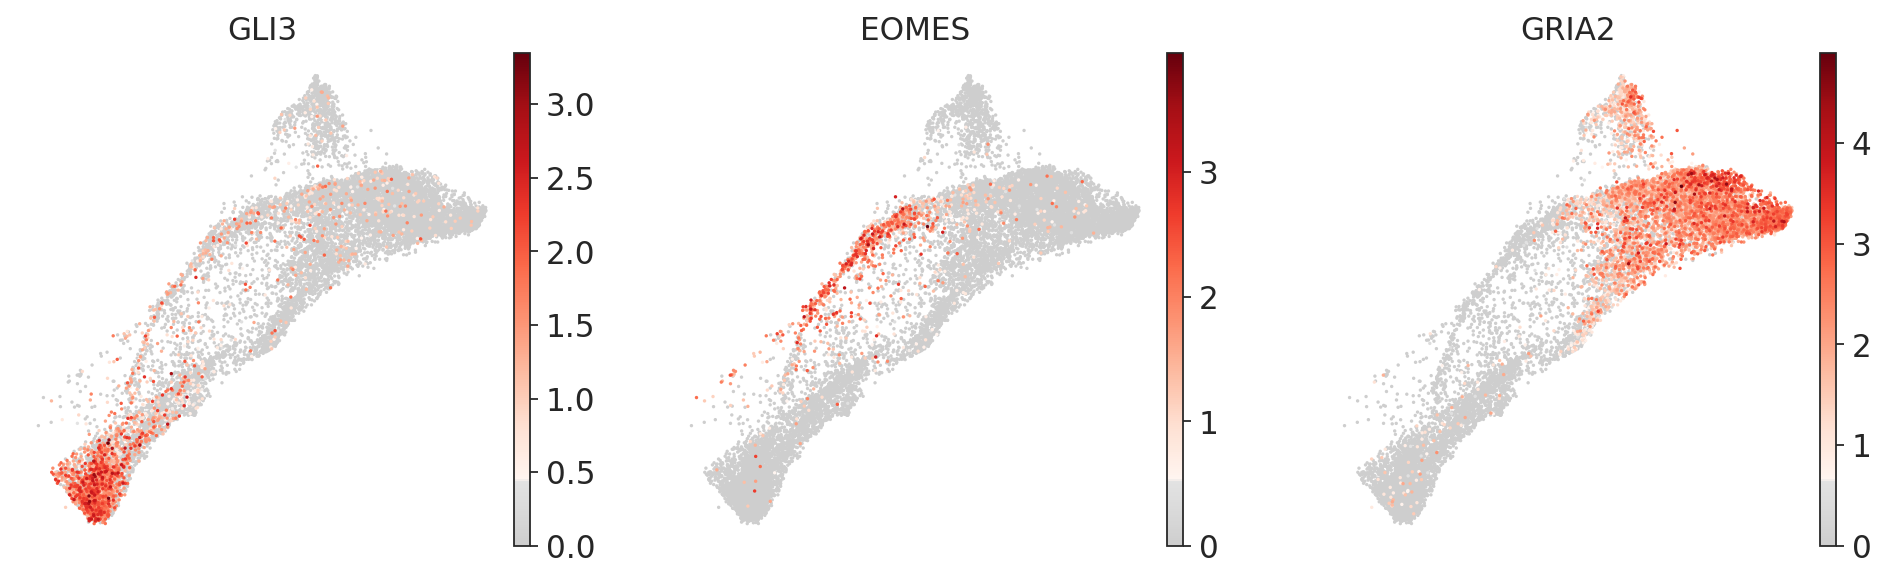

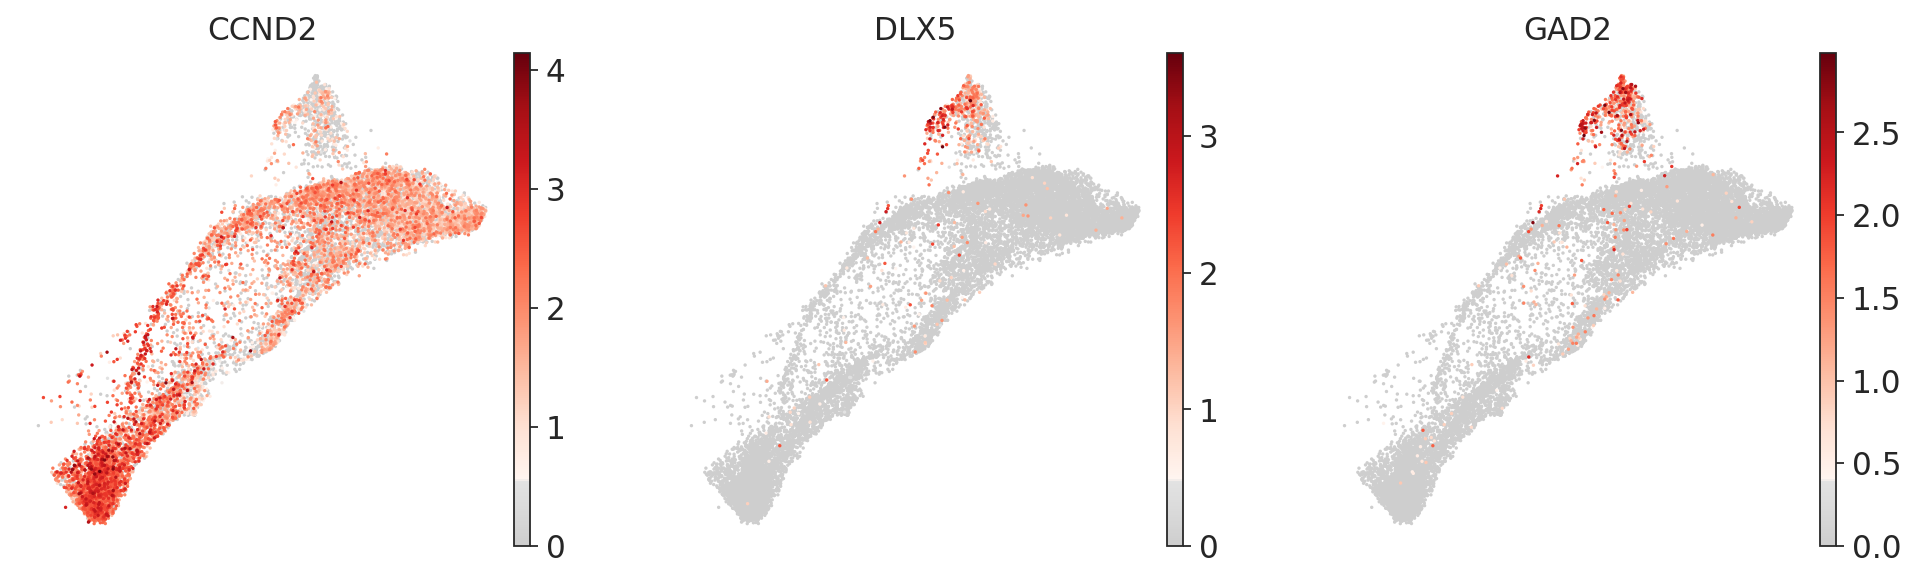

In [18]:
sc.pl.draw_graph(
                 pseudo_adata,
                 color=['GLI3','EOMES','GRIA2'],
                 cmap = mymap, frameon =False,
                 save='_NoIPC_dorsal_markers.svg',
)
sc.pl.draw_graph(
                 pseudo_adata,
                 color=['CCND2','DLX5','GAD2'],
                 cmap = mymap, frameon =False,
                 save='_NoIPC_ventral_markers.svg',
)